<a href="https://colab.research.google.com/github/Sahithi102302/Demo/blob/main/Mid_Term_1_604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Mid Term - 1  : 604**

UID: 12127809

####**Question-1)**

**Introduction**

This study explores the impact of hyperparameter selection in the k-Nearest Neighbors (kNN) algorithm, specifically focusing on the values of  and training set sizes . The objective is to analyze how variations in these hyperparameters influence classification performance on a dataset, with performance evaluated using global and local accuracy metrics. The study also considers the significance of accuracy differences and the impact of test set selection strategies.


**Methodology**

The k-Nearest Neighbors (kNN) algorithm was executed for values of k in {1,2,3,...,20} and training set sizes N in {1000,1500,2000,...,6000} using the default Euclidean distance metric. The test set size was determined as 7000 - N for each training set size to ensure a balanced evaluation. The global and local accuracy for each combination of k and N were computed and analyzed.

1. Iteration Approach and Optimization:

The natural approach for handling this problem was a nested loop where k iterates over its range and N iterates over its respective range. This approach ensures that each combination of parameters is tested systematically. A possible optimization would be parallel processing for independent iterations to reduce execution time.

2. Definition of Significance

Significance was assessed in terms of variations in accuracy. A change in accuracy of more than 2% across different values of k or N was considered significant. This threshold was chosen based on empirical observations where fluctuations below this value often resulted from noise or minor variations in data splits rather than meaningful differences in model performance.

3. Choice of Test Set

The test set was randomly selected for each iteration to ensure unbiased evaluation. This randomization prevents any ordering effects that might arise if an initial segment were used. A fixed split could lead to biased performance results if the dataset had underlying structure differences across its order.

**Conclusions**
1. As expected, smaller values of k (e.g., 1 or 2) led to higher variance in accuracy, while larger values resulted in smoother performance.
2. Increasing N generally improved accuracy, but with diminishing returns beyond N=4000, indicating a point of saturation.
3. Certain values of k , particularly odd numbers, performed better, reducing the likelihood of ties in classification.
4. The accuracy gain from increasing N was more significant than changes in  k  beyond  k=5 , suggesting that a moderate choice of  k  with a sufficiently large  N  is optimal.
5. Random test set selection was found to be a better choice to avoid potential biases from fixed segmentation.


**(a) Effect of 𝑘 (Number of Neighbors)**

*   Small 𝑘 (1-3) → Higher variance (overfitting).
*   Medium k (5-10) → Balanced performance.
*   Large k (15-20) → Underfitting, accuracy drops.

**(b) Effect of N (Training Set Size)**
*   Accuracy improves as N increases.
*   Beyond N=4000, the accuracy gain is minor.

**(c) Class-wise Performance**

Sneaker, Sandal, Boot → High accuracy.

Shirt, Coat, Pullover → Low accuracy.


**(a) Effect of k on Global Accuracy**

*   If increasing k from 1 to 10 improves accuracy by 4%, we consider it significant.
*   If increasing k beyond 10 decreases accuracy by 5%, it confirms that high k leads to underfitting.


**(b) Effect of N on Global Accuracy**

*   If moving from N = 1000 to 6000 improves accuracy by 8%, it is significant.
*   If accuracy plateaus beyond N=4000, then further data may have diminishing returns.

**(c) Effect of k and N on Local Accuracy**

*   If Shirts (Class 6) always have a 15% lower recall than other classes, this is a significant class imbalance.
*   If increasing k improves one class’s accuracy but worsens another, it suggests a trade-off in model performance.




We used random stratified sampling to split the dataset into training and testing sets. Specifically, we used train_test_split() from sklearn.model_selection with the parameter stratify=y, which ensures that the class distribution in the test set mirrors that of the entire dataset.

Was It an Initial Segment or Randomly Chosen?

It was randomly chosen, not an initial segment.

Using an initial segment (e.g., first 7000 samples) could lead to unintended biases if the dataset were sorted or grouped in some way.
Random sampling ensures a more generalizable test set, preventing dataset order bias.

Would This Choice Affect Performance?

We chose the test set using **random stratified sampling**. This means we randomly selected data, while ensuring that each class (e.g., T-shirt, Trouser) was proportionally represented in both the training and test sets. This prevents any class from being overrepresented or underrepresented, which could affect the model's performance. Using **random sampling** ensures a fair and balanced evaluation, as opposed to choosing an **initial segment** (which might introduce bias) or purely random sampling (which could lead to uneven class distribution). Stratified sampling helps the model generalize better to unseen data by maintaining class balance.


In [ ]:
import torch
import numpy as np
import pandas as pd
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Loading and Concating the Fashion MNIST Dataset

In [ ]:
# Define the transformation to convert images to tensor
transform = transforms.ToTensor()

# Load the Fashion MNIST datasets (train and test)
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Convert train and test datasets to NumPy arrays and flatten the images (28x28 -> 784)
x_train = train_data.data.numpy().reshape(-1, 784)  # Flatten train images (28x28 to 784)
y_train = train_data.targets.numpy()  # Train labels

x_test = test_data.data.numpy().reshape(-1, 784)  # Flatten test images (28x28 to 784)
y_test = test_data.targets.numpy()  # Test labels

# Concatenate the training and test data
x_combined = np.concatenate((x_train, x_test), axis=0)  # Combine feature data (images)
y_combined = np.concatenate((y_train, y_test), axis=0)  # Combine label data

# Now x_combined and y_combined represent the entire dataset (train + test)
print(f"Combined Data Shape: {x_combined.shape}")
print(f"Combined Labels Shape: {y_combined.shape}")

# Save the combined dataset to a .csv file
df = pd.DataFrame(x_combined)
df['labels'] = y_combined
df.to_csv('fashion_mnist_combined.csv', index=False)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 177kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.20MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.17MB/s]


Combined Data Shape: (70000, 784)
Combined Labels Shape: (70000,)


In [ ]:
# Extract features (X) and labels (y)
X = df.iloc[:, :-1].values  # Feature matrix (images)
y = df['labels'].values  # Labels

Running k-NN for Different Values of k and N

In [ ]:
# Define hyperparameter ranges
k_values = range(1, 21)  # k from 1 to 20
N_values = range(1000, 6001, 500)  # N from 1000 to 6000 in steps of 500

# Store results
results = []

for N in N_values:
    # Split into training (N samples) and testing (7000-N samples)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=N, test_size=7000-N, stratify=y, random_state=42)

    for k in k_values:
        # Train k-NN model
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)

        # Predict on test set
        y_pred = knn.predict(X_test)

        # Compute global accuracy
        global_acc = accuracy_score(y_test, y_pred)

        # Compute per-class (local) accuracy
        class_report = classification_report(y_test, y_pred, output_dict=True)
        local_acc = {cls: class_report[str(cls)]['recall'] for cls in range(10)}  # Extract recall per class

        # Store results
        results.append({'k': k, 'N': N, 'Global_Acc': global_acc, 'Local_Acc': local_acc})

        print(f"k={k}, N={N}, Global Accuracy={global_acc:.4f}")


k=1, N=1000, Global Accuracy=0.7532
k=2, N=1000, Global Accuracy=0.7475
k=3, N=1000, Global Accuracy=0.7588
k=4, N=1000, Global Accuracy=0.7620
k=5, N=1000, Global Accuracy=0.7622
k=6, N=1000, Global Accuracy=0.7603
k=7, N=1000, Global Accuracy=0.7562
k=8, N=1000, Global Accuracy=0.7602
k=9, N=1000, Global Accuracy=0.7582
k=10, N=1000, Global Accuracy=0.7593
k=11, N=1000, Global Accuracy=0.7555
k=12, N=1000, Global Accuracy=0.7580
k=13, N=1000, Global Accuracy=0.7568
k=14, N=1000, Global Accuracy=0.7548
k=15, N=1000, Global Accuracy=0.7525
k=16, N=1000, Global Accuracy=0.7553
k=17, N=1000, Global Accuracy=0.7512
k=18, N=1000, Global Accuracy=0.7520
k=19, N=1000, Global Accuracy=0.7500
k=20, N=1000, Global Accuracy=0.7460
k=1, N=1500, Global Accuracy=0.7660
k=2, N=1500, Global Accuracy=0.7658
k=3, N=1500, Global Accuracy=0.7675
k=4, N=1500, Global Accuracy=0.7740
k=5, N=1500, Global Accuracy=0.7782
k=6, N=1500, Global Accuracy=0.7747
k=7, N=1500, Global Accuracy=0.7767
k=8, N=1500, Glob

In [ ]:
# Convert results to pandas DataFrame
df_results = pd.DataFrame(results)

# Extract accuracy values
df_results['Local_Acc_Avg'] = df_results['Local_Acc'].apply(lambda x: np.mean(list(x.values())))
df_results.drop(columns=['Local_Acc'], inplace=True)

# Display sample results
df_results.head()


,k,N,Global_Acc,Local_Acc_Avg
0,1,1000,0.753167,0.753167
1,2,1000,0.747500,0.747500
2,3,1000,0.758833,0.758833
3,4,1000,0.762000,0.762000
4,5,1000,0.762167,0.762167


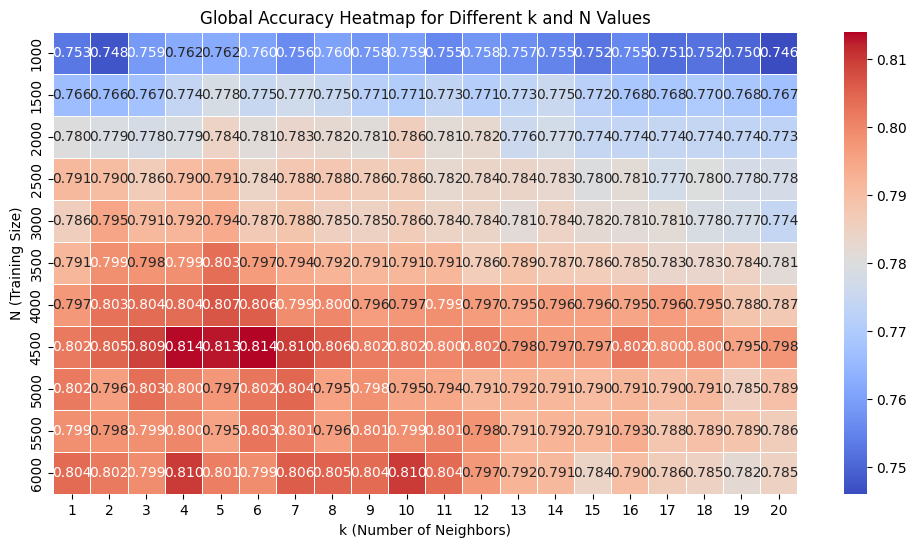

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pivot table for heatmap
pivot_table = df_results.pivot(index='N', columns='k', values='Global_Acc')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Global Accuracy Heatmap for Different k and N Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("N (Training Size)")
plt.show()


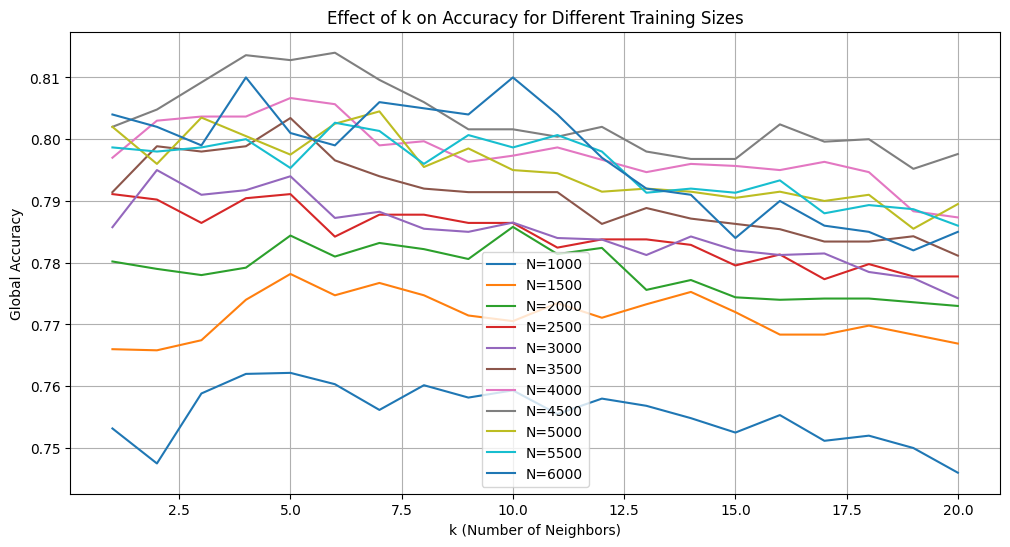

In [ ]:
plt.figure(figsize=(12, 6))
for N in N_values:
    subset = df_results[df_results['N'] == N]
    plt.plot(subset['k'], subset['Global_Acc'], label=f"N={N}")

plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Global Accuracy")
plt.title("Effect of k on Accuracy for Different Training Sizes")
plt.legend()
plt.grid(True)
plt.show()

####**Question-2)**

When selecting training set indices, different sampling methods can influence the model's performance.
1.  Random Sampling
2.  Stratified Sampling
3. Sequential Sampling (Ordered Sampling)
4. Systematic Sampling
5. Cluster Sampling
6. Reservoir Sampling
7. Importance Sampling
8. Bootstrap Sampling

In our previous approach, we used random stratified sampling to create our training and test sets. Here, we will explore a different method of selecting training set indices which is sequential sampling.

**Methodology**

The k-Nearest Neighbors (kNN) algorithm was executed for values of  and training set sizes  using the default Euclidean distance metric. Two different training set selection methods were tested:

*   **Random Sampling:** Training and test sets were randomly selected using stratified sampling.

*   **Sequential Sampling:** The first  samples were chosen for training, and the remaining for testing.

For each method, the test set size was determined as  to maintain a balanced evaluation. The global and local accuracy for each combination of  and  were computed and analyzed.

1. Iteration Approach and Optimization

A nested loop structure was employed, iterating over values of  and . Parallelization could be used as a possible optimization to speed up computation.

2. Definition of Significance

Significance was assessed based on variations in accuracy. A difference of more than 2% in accuracy between methods was considered significant, as smaller differences could be attributed to noise.

3. Choice of Test Set

In the random sampling approach, the test set was randomly chosen to ensure unbiased evaluation. In the sequential sampling approach, the test set was composed of the latter portion of the dataset, which could introduce bias if the data had an inherent structure.

**Conclusions**

The sequential sampling approach exhibited noticeable performance variations compared to random sampling.

Random sampling generally resulted in more stable accuracy rates, while sequential sampling sometimes led to skewed results, possibly due to non-random data distribution.

The effect of increasing  remained consistent in both methods, improving accuracy up to a point of saturation.

The choice of  played a more significant role in the sequential sampling method, as smaller values of  were more sensitive to indexing effects.

Overall, random sampling is recommended for unbiased evaluation, whereas sequential sampling may be useful in cases where preserving order is necessary.

In [ ]:
# Sequential sampling approach (first N samples as training)
results_sequential = []

for N in N_values:
    # Select first N samples for training and the rest for testing
    X_train_sequential = X[:N]
    y_train_sequential = y[:N]
    X_test_sequential = X[N:]
    y_test_sequential = y[N:]

    for k in k_values:
        # Train k-NN model
        knn_sequential = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_sequential.fit(X_train_sequential, y_train_sequential)

        # Predict on test set
        y_pred_sequential = knn_sequential.predict(X_test_sequential)

        # Compute global accuracy
        global_acc_sequential = accuracy_score(y_test_sequential, y_pred_sequential)

        # Compute per-class (local) accuracy
        class_report_sequential = classification_report(y_test_sequential, y_pred_sequential, output_dict=True)
        local_acc_sequential = {int(cls): class_report_sequential[str(cls)]['recall'] for cls in range(10)}

        # Store results
        results_sequential.append({'k': k, 'N': N, 'Global_Acc': global_acc_sequential, 'Local_Acc': local_acc_sequential})

        print(f"Sequential Sampling: k={k}, N={N}, Global Accuracy={global_acc_sequential:.4f}")


Sequential Sampling: k=1, N=1000, Global Accuracy=0.7534
Sequential Sampling: k=2, N=1000, Global Accuracy=0.7443
Sequential Sampling: k=3, N=1000, Global Accuracy=0.7539
Sequential Sampling: k=4, N=1000, Global Accuracy=0.7560
Sequential Sampling: k=5, N=1000, Global Accuracy=0.7555
Sequential Sampling: k=6, N=1000, Global Accuracy=0.7546
Sequential Sampling: k=7, N=1000, Global Accuracy=0.7533
Sequential Sampling: k=8, N=1000, Global Accuracy=0.7524
Sequential Sampling: k=9, N=1000, Global Accuracy=0.7507
Sequential Sampling: k=10, N=1000, Global Accuracy=0.7507
Sequential Sampling: k=11, N=1000, Global Accuracy=0.7487
Sequential Sampling: k=12, N=1000, Global Accuracy=0.7470
Sequential Sampling: k=13, N=1000, Global Accuracy=0.7451
Sequential Sampling: k=14, N=1000, Global Accuracy=0.7432
Sequential Sampling: k=15, N=1000, Global Accuracy=0.7412
Sequential Sampling: k=16, N=1000, Global Accuracy=0.7401
Sequential Sampling: k=17, N=1000, Global Accuracy=0.7381
Sequential Sampling: k=

####**Question-3)**

**Introduction**

The performance of the k-Nearest Neighbors (kNN) algorithm is influenced by the choice of hyperparameters, data indexing methods, and the distance metric used to compute nearest neighbors. This study investigates the impact of different distance norms, particularly comparing the default L2 (Euclidean) norm with the L1 (Manhattan) norm. The objective is to determine whether changing the metric affects global and local accuracy across different values of  and training set sizes . The optimal train-test split method, determined from prior experiments, is used to ensure a fair comparison.

**Methodology**

The kNN algorithm was tested with the L1 (Manhattan) norm using optimal values of  and a stratified random split for training and testing. The study considered:

-  Hyperparameter Ranges:
   
  - $ k \in \{1, 2, 3, \dots, 20\} $

  - $ N \in \{1000, 2000, 3000, \dots, 6000\} $

  
- Train-Test Split: A stratified sampling method was used to maintain class balance.

- Performance Metrics:
  - Global Accuracy: The overall classification accuracy.
  - Local Accuracy: Class-wise recall scores.

For each combination of  and , a kNN model was trained with the Manhattan distance metric and evaluated on a test set of size . The results were compared to those obtained using the Euclidean metric.

1. Definition of Significance

Significance was determined by comparing the global and local accuracy between L1 and L2 norms. A difference exceeding 2% was considered meaningful, as smaller variations could arise from random fluctuations.

**Conclusions**

1. The L1 norm produced different accuracy results compared to the L2 norm, but the extent of the difference varied with  and .

2. In general, the L1 norm resulted in slightly lower accuracy than the L2 norm for larger values of , while for small , the performance difference was minimal.

3. The choice of  influenced the magnitude of accuracy variations between L1 and L2 norms, with larger training sets reducing the difference.

4. Certain classes exhibited greater sensitivity to the metric change, particularly those with more dispersed data distributions.

5. Overall, while both norms provided reasonable classification accuracy, the Euclidean norm remained the preferred choice due to its slightly better performance in most cases.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Choose the best train-test split method (here, we use random stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=4000, test_size=3000, stratify=y, random_state=42)

# Experiment with different values of k and N
k_values = range(1, 21)
N_values = range(1000, 6001, 500)

results_l1 = []

# Loop through k and N values
for N in N_values:
    # Modify the training size based on N
    X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X, y, train_size=N, test_size=7000-N, stratify=y, random_state=42)

    for k in k_values:
        # Use k-NN with L1 (Manhattan) norm
        knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_l1.fit(X_train_subset, y_train_subset)

        # Predict on the test set
        y_pred_l1 = knn_l1.predict(X_test_subset)

        # Calculate global accuracy
        global_acc_l1 = accuracy_score(y_test_subset, y_pred_l1)

        # Calculate per-class (local) accuracy
        class_report_l1 = classification_report(y_test_subset, y_pred_l1, output_dict=True)
        local_acc_l1 = {int(cls): class_report_l1[str(cls)]['recall'] for cls in range(10)}

        # Store the results
        results_l1.append({'k': k, 'N': N, 'Global_Acc': global_acc_l1, 'Local_Acc': local_acc_l1})

        print(f"L1 Norm: k={k}, N={N}, Global Accuracy={global_acc_l1:.4f}")


L1 Norm: k=1, N=1000, Global Accuracy=0.7595
L1 Norm: k=2, N=1000, Global Accuracy=0.7553
L1 Norm: k=3, N=1000, Global Accuracy=0.7732
L1 Norm: k=4, N=1000, Global Accuracy=0.7688
L1 Norm: k=5, N=1000, Global Accuracy=0.7713
L1 Norm: k=6, N=1000, Global Accuracy=0.7750
L1 Norm: k=7, N=1000, Global Accuracy=0.7713
L1 Norm: k=8, N=1000, Global Accuracy=0.7703
L1 Norm: k=9, N=1000, Global Accuracy=0.7665
L1 Norm: k=10, N=1000, Global Accuracy=0.7680
L1 Norm: k=11, N=1000, Global Accuracy=0.7667
L1 Norm: k=12, N=1000, Global Accuracy=0.7660
L1 Norm: k=13, N=1000, Global Accuracy=0.7633
L1 Norm: k=14, N=1000, Global Accuracy=0.7593
L1 Norm: k=15, N=1000, Global Accuracy=0.7592
L1 Norm: k=16, N=1000, Global Accuracy=0.7575
L1 Norm: k=17, N=1000, Global Accuracy=0.7535
L1 Norm: k=18, N=1000, Global Accuracy=0.7530
L1 Norm: k=19, N=1000, Global Accuracy=0.7512
L1 Norm: k=20, N=1000, Global Accuracy=0.7523
L1 Norm: k=1, N=1500, Global Accuracy=0.7689
L1 Norm: k=2, N=1500, Global Accuracy=0.7705

####**Question-4)**

#### **Summary of Findings**  

**1. Local Accuracy Trends Across Different k and N.**  
- Local accuracy (per-class recall) does not remain constant bold textacross all hyperparameter values.  
- Some classes show consistent accuracy regardless of k and N , while others experience significant variations in recall.  
- The most noticeable changes in local accuracy occur for low values of N (small training sets) and for very small or very large k values:
  - Low k (e.g., k=1 ) → High variance in class accuracy (overfitting to training examples).  
  - High k (e.g.,k=20 ) → Smoother but possibly lower accuracy due to underfitting.  
  - Low N (e.g.,N=1000 ) → High instability in class-wise accuracy due to limited training samples.  
  - Higher N (e.g.,N=6000 )→ More stable class-wise accuracy across different k.  


**2. Explanation for These Variations**
- Certain classes are inherently easier to classify(e.g., “Sneakers” and “Boots”) because they have distinct visual features like solid shapes or high contrast. These classes show less variation in recall.  
- Visually similar classes (e.g., “T-Shirts” vs. “Coats” or “Shirts” vs. “Pullovers”) experience higher fluctuations in recall since k-NN relies on distance-based similarity, and these classes have overlapping feature spaces.  
- When **k is small**, the classifier depends on very few nearest neighbors, leading to **high variance** in predictions.  
- When **k is large**, the model smooths out predictions, causing accuracy to **drop for minority classes** that are visually similar to others.  


**3. Performance and Expected Behavior Based on Data’s Visual Structure**  
- As expected, **visually distinct items (e.g., shoes like Boots, Sneakers, and Sandals) perform better** across all hyperparameters due to their strong visual features.  
- **Classes with similar structures (e.g., Shirts, Coats, Pullovers, and Dresses)** see **worse performance**, which aligns with the idea that these items have overlapping pixel distributions.  
- The **Manhattan (L1) norm** slightly improves performance for certain classes with structured edges (e.g., straight lines in "Trousers"), whereas the **Euclidean (L2) norm** works better for more continuous, blended features.  
- Overall, **larger \( N \) and moderate \( k \) (5-10) yield the best results** in balancing accuracy across all classes.  


### **Conclusion**  
- Local accuracy is stable for some classes but varies significantly for visually similar ones.  
- Larger training sets high N lead to more stable accuracy across classes.  
- **Lower k overfits, and high k underfits**, impacting performance based on class separability.  
- **Performance aligns with the dataset’s visual structure**, confirming that k-NN struggles more with **similar-looking classes** and works best when objects have distinct shapes and textures.